In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from statsmodels.stats.power import TTestPower


In [2]:
# Wczytanie danych
df = pd.read_csv("symulacja_banku.csv")

# Konwersja kolumn na liczby
df["Czas_przyjscia"] = df["Czas_przyjscia"].astype(int)
df["Czas_rozpoczecia_obslugi"] = df["Czas_rozpoczecia_obslugi"].astype(int)
df["Czas_zakonczenia_obslugi"] = df["Czas_zakonczenia_obslugi"].astype(int)
df["Czas_oczekiwania"] = df["Czas_oczekiwania"].astype(int)
df["Dzien"] = df["Dzien"].astype(int)
df["Stanowisko"] = df["Stanowisko"].astype(int)

# Dodanie kolumny: czas_obslugi
df["Czas_obslugi"] = df["Czas_zakonczenia_obslugi"] - df["Czas_rozpoczecia_obslugi"]

In [3]:
print("Średni czas oczekiwania:", df["Czas_oczekiwania"].mean())

Średni czas oczekiwania: 14.855509355509355


In [4]:
# Testowanie hipotez statystycznych
# Hipoteza zerowa: Średni czas oczekiwania wynosi 10 minut
# Hipoteza alternatywna: Średni czas oczekiwania jest różny

# Test statystyczny: test t-Studenta dla jednej próby sprawdza, czy średnia z próby różni się od określonej wartości (13 minut)
# Test jednostronny
t_stat, p_val = stats.ttest_1samp(df["Czas_oczekiwania"], popmean=13)

print(f"Statystyka t: {t_stat:.3f}, p-wartość: {p_val:.5f}") # t_stat - średnia z próby znajduje się t odchylenia standardowe od wartości oczekiwanej, p-wartość, czyli prawdopodobieństwo otrzymania takiego lub bardziej ekstremalnego wyniku, zakładając, że hipoteza zerowa jest prawdziwa
if p_val < 0.05:
    print("Odrzucamy hipotezę zerową.")
else:
    print("Brak podstaw do odrzucenia hipotezy zerowej.")


Statystyka t: 3.458, p-wartość: 0.00057
Odrzucamy hipotezę zerową.


In [5]:
# Obliczenie mocy testu
effect_size = (df["Czas_oczekiwania"].mean() - 13) / df["Czas_oczekiwania"].std()
analysis = TTestPower()
power = analysis.power(effect_size=effect_size, nobs=len(df["Czas_oczekiwania"]), alpha=0.05)
print(f"Moc testu: {power:.4f}")

Moc testu: 0.9324


In [6]:
# Sprawdzenie normalności rozkładu

shapiro_test = stats.shapiro(df["Czas_przyjscia"].sample(n=200))
print(f"Shapiro-Wilk p-wartość: {shapiro_test.pvalue:.5f}")


Shapiro-Wilk p-wartość: 0.00005


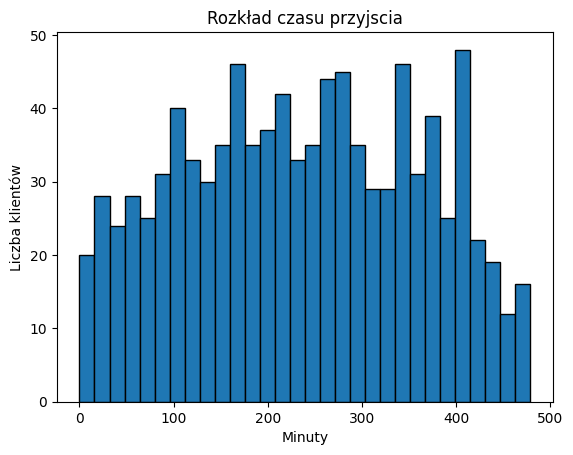

In [7]:
plt.hist(df["Czas_przyjscia"], bins=30, edgecolor='black')
plt.title("Rozkład czasu przyjscia")
plt.xlabel("Minuty")
plt.ylabel("Liczba klientów")
plt.show()

In [8]:
# Testowanie jednorodności rozkładu długości kolejek
# Hipoteza zerowa: Długości kolejek w momencie przyjścia mają rozkład jednostajny
# Hipoteza alternatywna: Długości kolejek w momencie przyjścia nie mają rozkładu jednostajnego

# Test chi-kwadrat
from scipy.stats import chisquare

# Częstość długości kolejki
dlugosc_kolejki = df["Dlugosc kolejki w momencie przyjscia"].astype(int)
obserwowane = dlugosc_kolejki.value_counts().sort_index()

# Zakładamy, że rozkład jednostajny - każda wartość ma taką samą częstość
spodziewane = [len(dlugosc_kolejki) / len(obserwowane)] * len(obserwowane)

# Test chi-kwadrat
chi2_stat, chi2_p = chisquare(f_obs=obserwowane, f_exp=spodziewane)
print("\nTest chi-kwadrat:")
print(f"χ² = {chi2_stat:.4f}, p-wartość = {chi2_p:.5f}")
if chi2_p < 0.05:
    print("Odrzucamy hipotezę zerową o jednorodności rozkładu długości kolejek.")
else:
    print("Brak podstaw do odrzucenia hipotezy zerowej o jednorodności rozkładu długości kolejek.")


Test chi-kwadrat:
χ² = 1394.6570, p-wartość = 0.00000
Odrzucamy hipotezę zerową o jednorodności rozkładu długości kolejek.


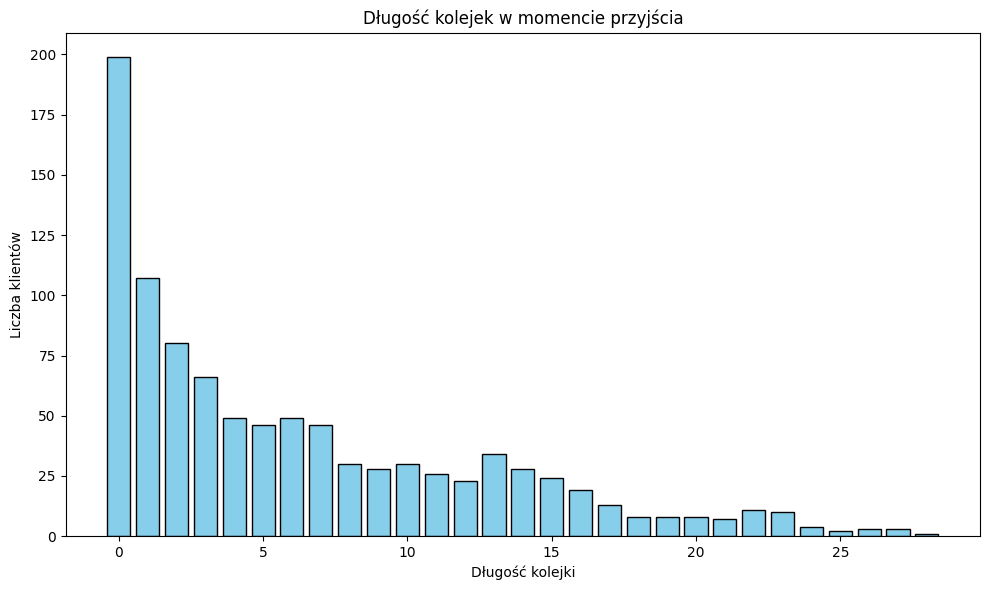

In [9]:
# Wizualizacja długości kolejek
plt.figure(figsize=(10, 6))
plt.bar(obserwowane.index, obserwowane.values, color='skyblue', edgecolor='black')
plt.title("Długość kolejek w momencie przyjścia")
plt.xlabel("Długość kolejki")
plt.ylabel("Liczba klientów")
plt.tight_layout()
plt.show()

In [10]:
df["Czas_obslugi"] = df["Czas_zakonczenia_obslugi"] - df["Czas_rozpoczecia_obslugi"]

Shapiro-Wilk test dla czasu obsługi:
Statistic = 0.7223, p-value = 0.0000


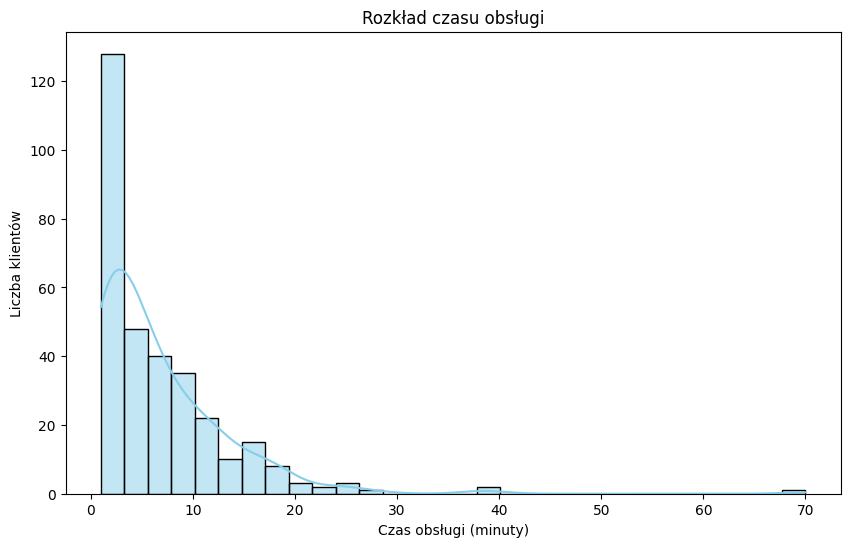

In [11]:
# Shapiro-Wilk
shapiro = stats.shapiro(df[df['Stanowisko'] == 2]['Czas_obslugi'])
print("Shapiro-Wilk test dla czasu obsługi:")
print(f"Statistic = {shapiro.statistic:.4f}, p-value = {shapiro.pvalue:.4f}")
# Wykres rozkładu czasu obsługi
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Stanowisko'] == 2]['Czas_obslugi'], bins=30, kde=True, color='skyblue')
plt.title("Rozkład czasu obsługi")
plt.xlabel("Czas obsługi (minuty)")
plt.ylabel("Liczba klientów")
plt.show()

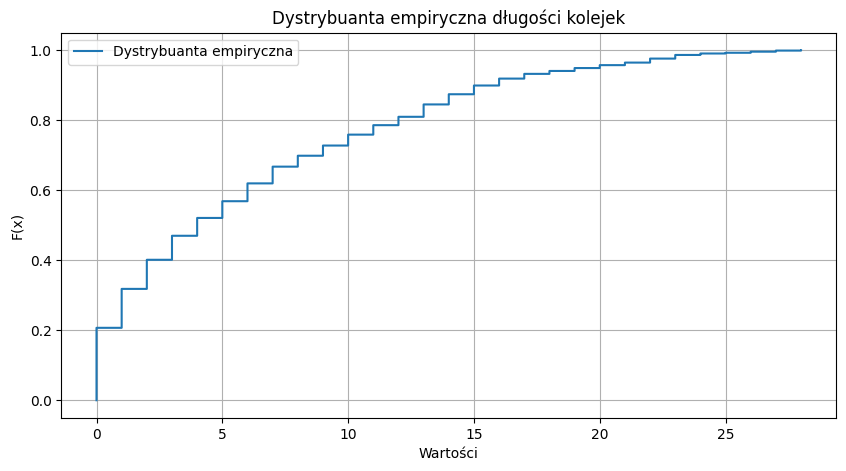

In [12]:
# Dystrybuanta empiryczna -  funkcja "schodkowa" o skokach w punktach odpowiadających kolejnym wartościom próby
from statsmodels.distributions.empirical_distribution import ECDF
data = df["Dlugosc kolejki w momencie przyjscia"]
ecdf = ECDF(data)
x = np.linspace(min(data), max(data))
plt.figure(figsize=(10, 5))
plt.step(ecdf.x, ecdf.y, label='Dystrybuanta empiryczna', where='post')
plt.title("Dystrybuanta empiryczna długości kolejek")
plt.xlabel("Wartości")
plt.ylabel("F(x)")
plt.legend()
plt.grid(True)
plt.show()

In [13]:
# Test Kołmogorowa-Smirnowa dla sprawdzenia, czy dane pochodzą z rozkładu normalnego (długość kolejek)
ks_stat, ks_p = stats.kstest(data, 'norm', args=(np.mean(data), np.std(data)))
print(f"Test Kołmogorowa-Smirnowa: statystyka={ks_stat:.4f}, p-wartość={ks_p:.5f}")


Test Kołmogorowa-Smirnowa: statystyka=0.1658, p-wartość=0.00000


In [14]:
# Test Andersona-Darlinga dla normalności rozkładu czasu oczekiwania
czasy = df["Czas_oczekiwania"].dropna()

result_ad = stats.anderson(czasy, dist='norm')
print("\nTest Andersona–Darlinga:")
print(f"Statystyka A² = {result_ad.statistic:.4f}")
for cv, sig in zip(result_ad.critical_values, result_ad.significance_level):
    if result_ad.statistic > cv:
        print(f"→ Na poziomie istotności {sig}%: odrzucamy hipotezę o normalności (A² = {result_ad.statistic:.4f} > {cv})")
    else:
        print(f"→ Na poziomie istotności {sig}%: brak podstaw do odrzucenia hipotezy (A² = {result_ad.statistic:.4f} < {cv})")



Test Andersona–Darlinga:
Statystyka A² = 47.0656
→ Na poziomie istotności 15.0%: odrzucamy hipotezę o normalności (A² = 47.0656 > 0.574)
→ Na poziomie istotności 10.0%: odrzucamy hipotezę o normalności (A² = 47.0656 > 0.653)
→ Na poziomie istotności 5.0%: odrzucamy hipotezę o normalności (A² = 47.0656 > 0.784)
→ Na poziomie istotności 2.5%: odrzucamy hipotezę o normalności (A² = 47.0656 > 0.914)
→ Na poziomie istotności 1.0%: odrzucamy hipotezę o normalności (A² = 47.0656 > 1.088)


In [15]:
# Test dla wartości średniej - rozkład dowolny, duża próba
# Hipoteza zerowa: Średni czas oczekiwania wynosi 16 minut
data = df["Czas_oczekiwania"].dropna()
m_0 = 80

n = len(data)
sample_mean = np.mean(data)
sample_std = np.std(data)  # estymator odchylenia standardowego
u = (sample_mean - m_0)/sample_std * np.sqrt(n)  # różnica między średnią próby a wartością oczekiwaną

print(f"Hipoteza zerowa: Średni czas oczekiwania wynosi {m_0} minut")
print(f"Średnia z próby: {sample_mean:.2f}, Odchylenie standardowe z próby: {sample_std:.2f}")
print(f"Test średniej (duża próba, rozkład dowolny):")
print(f"Wartość statystyki testowej: {u:.2f}")
if sample_mean > m_0 and u < 1.96:  # dla poziomu istotności 0.05
    print("Przyjmujemy hipotezę zerową.")
elif sample_mean < m_0 and u > -1.96:
    print("Przyjmujemy hipotezę zerową.")
else:
    print("Odrzucamy hipotezę zerową.")

Hipoteza zerowa: Średni czas oczekiwania wynosi 80 minut
Średnia z próby: 14.86, Odchylenie standardowe z próby: 16.64
Test średniej (duża próba, rozkład dowolny):
Wartość statystyki testowej: -121.46
Odrzucamy hipotezę zerową.


In [16]:
# Test dla wariancji
# Hipoteza: wariancja = sigma_0^2

sigma_sq = statistics.variance(data)
sigma_0_sq = 20.0  # przykładowa wartość wariancji do testu

u_w = (sigma_sq-sigma_0_sq)/sigma_0_sq * np.sqrt(n/2)

print(f"\nHipoteza zerowa: Wariancja wynosi {sigma_0_sq:.2f}")
print(f"Obliczona wariancja z próby: {sigma_sq:.2f}")
print(f"\nTest wariancji - rozkład dowolny z dużą próbą:")
print(f"Wartość statystyki testowej: {u_w:.2f}")
if sigma_sq < sigma_0_sq and u_w > -2.56 :  # dla poziomu istotności 0.05
    print("Przyjmujemy hipotezę zerową.")
elif sigma_sq > sigma_0_sq and u_w < 2.56:
    print("Przyjmujemy hipotezę zerową.")
else:
    print("Odrzucamy hipotezę zerową.")


Hipoteza zerowa: Wariancja wynosi 20.00
Obliczona wariancja z próby: 277.04

Test wariancji - rozkład dowolny z dużą próbą:
Wartość statystyki testowej: 281.87
Odrzucamy hipotezę zerową.


In [17]:
# Test dla procentu
# Hipoteza zerowa H0 : p = 0.3 wobec alternatywy H1 : p > 0.3. 

M = (df["Stanowisko"] == 2).sum()  # liczba klientów na stanowisku 2
n = len(df)  # całkowita liczba klientów

p_0 = 0.30

u_p = (M - n * p_0)/ np.sqrt(n * p_0 * (1 - p_0))

print(f"Liczba klientów na stanowisku 2: {M}")
print(f"\nTest dla procentu (frakcji):")
print(f"Wartość statystyki testowej: {u_p:.2f}")
if u_p < 1.96:
    print("Przyjmujemy hipotezę zerową.")
else:
    print("Odrzucamy hipotezę zerową  na korzyść alternatywy.")

Liczba klientów na stanowisku 2: 318

Test dla procentu (frakcji):
Wartość statystyki testowej: 2.07
Odrzucamy hipotezę zerową  na korzyść alternatywy.


In [18]:
# Sprawdzenie normalności czasu obsługi na stanowisku 2
shapiro_test_obsluga_2 = stats.shapiro(df[df['Stanowisko'] == 2]['Czas_obslugi'])
print(f"\nShapiro-Wilk test dla czasu obsługi na stanowisku 2:")
print(f"Statystyka = {shapiro_test_obsluga_2.statistic:.4f}, p-wartość = {shapiro_test_obsluga_2.pvalue:.4f}")


Shapiro-Wilk test dla czasu obsługi na stanowisku 2:
Statystyka = 0.7223, p-wartość = 0.0000


In [19]:
# Sprawdzenie normalności czasu obsługi na stanowisku 3
shapiro_test_obsluga_3 = stats.shapiro(df[df['Stanowisko'] == 3]['Czas_obslugi'])
print(f"\nShapiro-Wilk test dla czasu obsługi na stanowisku 3:")
print(f"Statystyka = {shapiro_test_obsluga_2.statistic:.4f}, p-wartość = {shapiro_test_obsluga_3.pvalue:.4f}")


Shapiro-Wilk test dla czasu obsługi na stanowisku 3:
Statystyka = 0.7223, p-wartość = 0.0000


In [20]:
# Test dla dwóch średnich rozkłady dowolne z dużymi próbami
# Hipoteza zerowa: Średni czas obsługi na stanowisku 2 i 3 jest taki sam
# Hipoteza alternatywna: Średni czas obsługi na stanowisku 2 jest krótszy niż na stanowisku 3

srednia_3 = np.mean(df[df['Stanowisko'] == 3]['Czas_obslugi'])
srednia_2 = np.mean(df[df['Stanowisko'] == 2]['Czas_obslugi'])

wariancja_3 = np.var(df[df['Stanowisko'] == 3]['Czas_obslugi'], ddof=1)
wariancja_2 = np.var(df[df['Stanowisko'] == 2]['Czas_obslugi'], ddof=1)

n_3 = len(df[df['Stanowisko'] == 3]['Czas_obslugi'])
n_2 = len(df[df['Stanowisko'] == 2]['Czas_obslugi'])

u_ws = (srednia_3 - srednia_2) / np.sqrt((wariancja_3/n_3) + (wariancja_2/n_2))

print(f"\nTest dla dwóch średnich (rozkłady dowolne, duże próby):")
print(f"Średni czas obsługi na stanowisku 2: {srednia_2:.2f}, Średni czas obsługi na stanowisku 3: {srednia_3:.2f}")
print(f"Wariancja czasu obsługi na stanowisku 2: {wariancja_2:.2f}, Wariancja czasu obsługi na stanowisku 3: {wariancja_3:.2f}")
print(f"Wartość statystyki testowej: {u_ws:.2f}")
print("Zbiór krytyczny: (1.64, ∞)")
if u_ws < 1.64:
    print("Przyjmujemy hipotezę zerową.")
else:
    print("Odrzucamy hipotezę zerową na korzyść alternatywy, że średni czas obsługi na stanowisku 2 jest krótszy niż na stanowisku 3.")


Test dla dwóch średnich (rozkłady dowolne, duże próby):
Średni czas obsługi na stanowisku 2: 6.75, Średni czas obsługi na stanowisku 3: 7.82
Wariancja czasu obsługi na stanowisku 2: 49.15, Wariancja czasu obsługi na stanowisku 3: 66.14
Wartość statystyki testowej: 1.68
Zbiór krytyczny: (1.64, ∞)
Odrzucamy hipotezę zerową na korzyść alternatywy, że średni czas obsługi na stanowisku 2 jest krótszy niż na stanowisku 3.


In [21]:
from scipy.stats import kruskal

# Przykładowe dane z 3 grup
grupa1 = df[df['Stanowisko'] == 1]['Czas_obslugi']
grupa2 = df[df['Stanowisko'] == 2]['Czas_obslugi']
grupa3 = df[df['Stanowisko'] == 3]['Czas_obslugi']

# Test Kruskala-Wallisa
statystyka, p_wartosc = kruskal(grupa1, grupa2, grupa3)

print("\nTest Kruskala-Wallisa:")
print(f"Statystyka H: {statystyka}")
print(f"Wartość p: {p_wartosc}")

# Interpretacja wyniku
if p_wartosc < 0.05:
    print("Odrzucamy H0: Istnieją istotne różnice między grupami.")
else:
    print("Brak podstaw do odrzucenia H0: Brak istotnych różnic między grupami.")



Test Kruskala-Wallisa:
Statystyka H: 9.904478130202548
Wartość p: 0.00706756645810167
Odrzucamy H0: Istnieją istotne różnice między grupami.


In [22]:
from scipy.stats import kruskal

# Grupujemy dane według stanowiska
grupy = []
for stanowisko in df['Stanowisko'].unique():
    grupa = df[df['Stanowisko'] == stanowisko]['Czas_oczekiwania']
    grupy.append(grupa)

stat, p = kruskal(*grupy)

print(f"Statystyka H: {stat}")
print(f"Wartość p: {p}")

if p < 0.05:
    print("Istnieją istotne różnice w czasie oczekiwania między stanowiskami.")
else:
    print("Brak istotnych różnic w czasie oczekiwania między stanowiskami.")


Statystyka H: 1.9517160363488666
Wartość p: 0.3768688544724387
Brak istotnych różnic w czasie oczekiwania między stanowiskami.
